<a href="https://colab.research.google.com/github/saeid-uot/3253-Machine-Learning/blob/main/Week_07%2520-%2520Trees%252C%2520Ensemble%252C%2520Bootstrap%252C%2520Boosting/0_3253_Week_7_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective:
Below Python code aims to demonstrate the implementation and evaluation of various ensemble learning techniques, including Decision Tree, Random Forest, and Extra Trees classifiers, on a synthetic dataset.

Step 1: Initially, the dataset is generated and balanced using the Synthetic Minority Over-sampling Technique (SMOTE).

Steps that are omitted: There are several steps here, including description, visualization to better understand data, deal with outlier, missing values, scaling, etc etc. We skip them for the sake of simplicity for now

Step 2: The dataset is split into training and testing sets.


Step 3: Individual models are then trained and evaluated using metrics such as accuracy, precision, recall, F1 score, and area under the ROC curve (AUC).

Step 4: Finally, the results from each model are aggregated into a tabular format for straightforward comparison, facilitating an understanding of the performance differences between the ensemble learning methods employed.

# Step 1: Loading Packages and Generate a dataset

In [1]:
# Step 1: Load dataset and balance the data using SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Generating a synthetic dataset
# class_sep   default=1.0 The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.
# Learning mode about make_classification here https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

X, y = make_classification(n_samples=5000, n_features=25,class_sep=0.01, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Split the dataset

In [2]:

# Step 2: Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Clean memory up to ensure it won't slow down your work!
del X_resampled,y_resampled

# Step 3A - Train and Evaluate a **Decision Tree**

In [3]:
# Step 3: Build and evaluate the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)

dt_cm = confusion_matrix(y_test, dt_preds)

# Evaluation metrics for Decision Tree
dt_metrics = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, dt_preds),
    "Precision": precision_score(y_test, dt_preds),
    "Recall": recall_score(y_test, dt_preds),
    "F1 Score": f1_score(y_test, dt_preds),
    "AUC": roc_auc_score(y_test, dt_preds)
}

print(dt_metrics,"\n","Confusion Matrix:\n", dt_cm)


{'Model': 'Decision Tree', 'Accuracy': 0.8270089285714286, 'Precision': 0.812753036437247, 'Recall': 0.865301724137931, 'F1 Score': 0.838204592901879, 'AUC': 0.8255906768837804} 
 Confusion Matrix:
 [[679 185]
 [125 803]]


# Step 3A - Train and Evaluate a **Vanilla SVM Model**

In [4]:
# Step 3: Build and evaluate the Decision Tree model
from sklearn.svm import SVC

# Decision Tree
svc_clf = SVC(probability=True, random_state=42)
svc_clf.fit(X_train, y_train)
svc_preds = svc_clf.predict(X_test)

svc_cm = confusion_matrix(y_test, svc_preds)

# Evaluation metrics for Decision Tree
svc_metrics = {
    "Model": "Support Vector Machine",
    "Accuracy": accuracy_score(y_test, svc_preds),
    "Precision": precision_score(y_test, svc_preds),
    "Recall": recall_score(y_test, svc_preds),
    "F1 Score": f1_score(y_test, svc_preds),
    "AUC": roc_auc_score(y_test, svc_preds)
}

print(svc_metrics,"\n","Confusion Matrix:\n", svc_cm)
print(">>>>>>>>>>>>>There is a change of F1 score from ", dt_metrics['F1 Score']," to ",svc_metrics['F1 Score'])

{'Model': 'Support Vector Machine', 'Accuracy': 0.9168526785714286, 'Precision': 0.8837438423645321, 'Recall': 0.9665948275862069, 'F1 Score': 0.923314462171899, 'AUC': 0.9150103767560664} 
 Confusion Matrix:
 [[746 118]
 [ 31 897]]
>>>>>>>>>>>>>There is a change of F1 score from  0.838204592901879  to  0.923314462171899


# Step 3C - Tune and Evaluate a **SVC With Kernel**

In [5]:
# Build and evaluate the Support Vector Machine model with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.1, 0.01],  # Kernel coefficient
    'kernel': ['rbf']  # Kernel type
}

# Initialize the SVM classifier
svc_clf = SVC(probability=True,random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svc_clf, param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_svc_clf = grid_search.best_estimator_

# Make predictions on the test set
tuned_svc_preds = best_svc_clf.predict(X_test)

tuned_svc_cm = confusion_matrix(y_test, tuned_svc_preds)

# Evaluation metrics for Support Vector Machine
tuned_svc_metrics = {
    "Model": "Support Vector Machine",
    "Accuracy": accuracy_score(y_test, tuned_svc_preds),
    "Precision": precision_score(y_test, tuned_svc_preds),
    "Recall": recall_score(y_test, tuned_svc_preds),
    "F1 Score": f1_score(y_test, tuned_svc_preds),
    "AUC": roc_auc_score(y_test, tuned_svc_preds)
}

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print()

# Print the evaluation metrics
print("Evaluation Metrics for Support Vector Machine:")
print(tuned_svc_metrics,"\n","Confusion Matrix:\n", tuned_svc_cm)

#Slightly different way of printing; we are using 'f' in the beginning to directly embed python objects inside a {} within the quote itself instead of separating them using comma
print(f">>>>>>>>>>>>> For {dt_metrics['Model']}, there is a change of F1 score from {dt_metrics['F1 Score']} to {tuned_svc_metrics['F1 Score']} compared to {tuned_svc_metrics['Model']}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Evaluation Metrics for Support Vector Machine:
{'Model': 'Support Vector Machine', 'Accuracy': 0.9893973214285714, 'Precision': 0.9809523809523809, 'Recall': 0.9989224137931034, 'F1 Score': 0.9898558462359851, 'AUC': 0.9890445402298851} 
 Confusion Matrix:
 [[846  18]
 [  1 927]]
>>>>>>>>>>>>> For Decision Tree, there is a change of F1 score from 0.838204592901879 to 0.9898558462359851 compared to Support Vector Machine


#Compare AUC of Decision Tree, Vanilla SVC without hyperparameter tuning, and SVC with kernel which is tuned

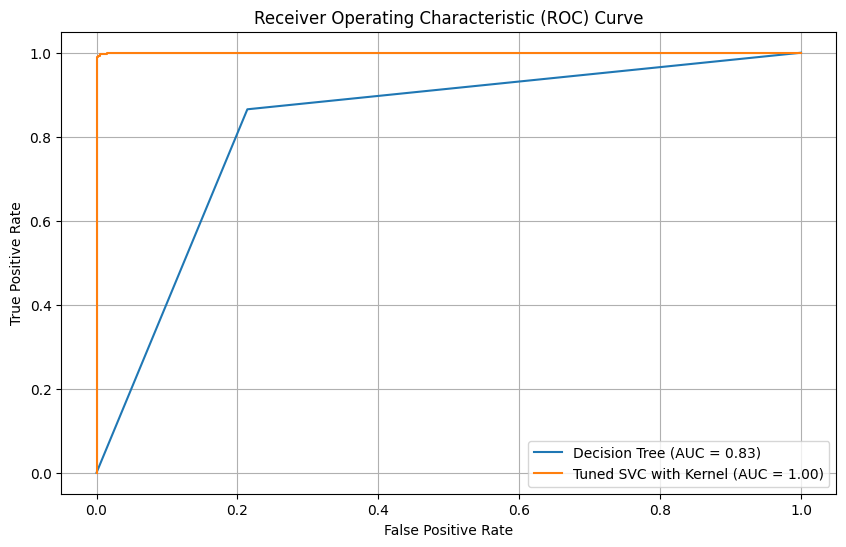

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize a plot
plt.figure(figsize=(10, 6))

# Plot ROC curve and calculate AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_clf.predict_proba(X_test)[:, 1])
auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Plot ROC curve and calculate AUC for Decision Tree
fpr_svc, tpr_svc, _ = roc_curve(y_test, best_svc_clf.predict_proba(X_test)[:, 1])
auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, label=f'Tuned SVC with Kernel (AUC = {auc_svc:.2f})')


# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.grid(True)
plt.show()


In [8]:
# Combine all metrics into a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame([dt_metrics, svc_metrics, tuned_svc_metrics])
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree,0.827009,0.812753,0.865302,0.838205,0.825591
1,Support Vector Machine,0.916853,0.883744,0.966595,0.923314,0.915010
2,Support Vector Machine,0.989397,0.980952,0.998922,0.989856,0.989045


#Class Experiment
Experiment with the above 2 blocks of code; i.e. vanilla SVC and tuned SVC and see for yourself how adding complexity to the dataset impact on the performance of the model. To make the dataset harder to train, you can adjust the class_sep parameter in the make_classification function to decrease the separation between classes. Additionally, you can increase the number of samples and features to make the dataset more complex.

make_classification(n_samples=8000, n_features=30,class_sep=0.001, n_classes=2, weights=[0.9, 0.1], random_state=42)

In [9]:
from IPython.display import Image

# URL of the image
image_url = "https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_11_MicrosoftTeams-image-17.jpg"

# Display the image
Image(url=image_url)

# Step 3B: Build and evaluate other **ensemble models**

First we cleanup the memory and restart the session




In [ ]:
# In Google Colab, we can restart the kernel programmatically using below code. Resetting the kernel is similar to resetting your computer. You will start with a clearn notebook
# we restart the kernel to make it simpler to continue and avoid any issue in the code caused by the above blocks of code. It is a good practice!
# Restart the kernel
import os
os.kill(os.getpid(), 9)

#Below 1 block of code is a bit of repetition of the first few code blocks in this notebook.

In [ ]:
# Step 1: Load dataset and balance the data using SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Generating a synthetic dataset
# class_sep   default=1.0 The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.
# Learning mode about make_classification here https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

X, y = make_classification(n_samples=5000, n_features=25,class_sep=0.01, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Clean memory up to ensure it won't slow down your work!
del X_resampled,y_resampled

# Step 3: Build and evaluate the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)

dt_cm = confusion_matrix(y_test, dt_preds)

# Evaluation metrics for Decision Tree
dt_metrics = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, dt_preds),
    "Precision": precision_score(y_test, dt_preds),
    "Recall": recall_score(y_test, dt_preds),
    "F1 Score": f1_score(y_test, dt_preds),
    "AUC": roc_auc_score(y_test, dt_preds)
}

print(dt_metrics,"\n","Confusion Matrix:\n", dt_cm)

# Build and evaluate Random Forest ensemble model


In [ ]:
# Build and evaluate other ensemble models individually
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

rf_cm = confusion_matrix(y_test, rf_preds)

# Evaluation metrics for Random Forest
rf_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, rf_preds),
    "Precision": precision_score(y_test, rf_preds),
    "Recall": recall_score(y_test, rf_preds),
    "F1 Score": f1_score(y_test, rf_preds),
    "AUC": roc_auc_score(y_test, rf_preds)
}
print(rf_metrics,"\n","Confusion Matrix:\n", rf_cm)

print(f">>>>>>>>>>>>> For {dt_metrics['Model']}, there is a change of F1 score from {round(dt_metrics['F1 Score'],2)} to {round(rf_metrics['F1 Score'],2)} compared to {rf_metrics['Model']} ")

# Please note that in this code, we haven't yet tuned the Random Forest. Tuning it, further improve the
# performance of the model. But, simply changing decision tree to random forest made a siginificant change in performance

# Build and evaluate Extra Tree ensemble model


In [ ]:
import pandas as pd

# Extra Trees
et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(X_train, y_train)
et_preds = et_clf.predict(X_test)

et_cm = confusion_matrix(y_test, et_preds)

# Evaluation metrics for Extra Trees
et_metrics = {
    "Model": "Extra Trees",
    "Accuracy": accuracy_score(y_test, et_preds),
    "Precision": precision_score(y_test, et_preds),
    "Recall": recall_score(y_test, et_preds),
    "F1 Score": f1_score(y_test, et_preds),
    "AUC": roc_auc_score(y_test, et_preds)
}

print(et_metrics,"\n","Confusion Matrix:\n", et_cm)

print(f">>>>>>>>>>>>> For {dt_metrics['Model']}, there is a change of F1 score from {round(dt_metrics['F1 Score'],2)} to {round(et_metrics['F1 Score'],2)} compared to {et_metrics['Model']} ")



# Build and evaluate Adaboost ensemble model



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoost
adaboost_clf = AdaBoostClassifier(random_state=42)
adaboost_clf.fit(X_train, y_train)
adaboost_preds = adaboost_clf.predict(X_test)

adaboost_cm = confusion_matrix(y_test, adaboost_preds)

# Evaluation metrics for AdaBoost
adaboost_metrics = {
    "Model": "AdaBoost",
    "Accuracy": accuracy_score(y_test, adaboost_preds),
    "Precision": precision_score(y_test, adaboost_preds),
    "Recall": recall_score(y_test, adaboost_preds),
    "F1 Score": f1_score(y_test, adaboost_preds),
    "AUC": roc_auc_score(y_test, adaboost_preds)
}

print(adaboost_metrics,"\n","Confusion Matrix:\n", adaboost_cm)

print(f">>>>>>>>>>>>> For {dt_metrics['Model']}, there is a change of F1 score from {round(dt_metrics['F1 Score'],2)} to {round(adaboost_metrics['F1 Score'],2)} compared to {adaboost_metrics['Model']} ")

# Build and evaluate XGBoost ensemble model


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# XGBoost
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)

xgb_cm = confusion_matrix(y_test, xgb_preds)

# Evaluation metrics for XGBoost
xgb_metrics = {
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, xgb_preds),
    "Precision": precision_score(y_test, xgb_preds),
    "Recall": recall_score(y_test, xgb_preds),
    "F1 Score": f1_score(y_test, xgb_preds),
    "AUC": roc_auc_score(y_test, xgb_preds)
}

print(xgb_metrics,"\n","Confusion Matrix:\n", xgb_cm)

print(f">>>>>>>>>>>>> For {dt_metrics['Model']}, there is a change of F1 score from {round(dt_metrics['F1 Score'],2)} to {round(xgb_metrics['F1 Score'],2)} compared to {xgb_metrics['Model']} ")


# Compare Decision Tree, Random Forest,  Extra Tree, Adaboost, and XGboost

In [ ]:
# Create a DataFrame with evaluation metrics for all models
results_df = pd.DataFrame([dt_metrics, rf_metrics, et_metrics, adaboost_metrics, xgb_metrics])

# Highlight the highest values in each column
highlighted_df = results_df.style.highlight_max(axis=0,subset=['Accuracy','Precision','Recall','F1 Score','AUC'])

# Display the highlighted DataFrame
highlighted_df


#Question for learners:

- What do you observe? Summarize your findings
- Why do see changes in performance? Discuss it in the class.